In [117]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

Set data directory path

In [118]:
datapath = "/home/tomortiz/projects/geospatial/data"

In [119]:
misc_ease = gpd.read_file(datapath+"/ME/Misc_Easements.shp")

In [120]:
type(misc_ease)

geopandas.geodataframe.GeoDataFrame

In [121]:
misc_ease.head()

,PROJECT_NU,PROJECT_NA,LEASE_NUMB,LEASE_STAT,PHOTO_ID,ACTIVITY,TOTAL_CONS,PRIMARY_LE,ALL_LESSEE,PROJECT_LA,PROJECT_LO,SurfaceSys,LeaseSyste,Purpose,GLO_NUMBER,geometry
0,None,None,None,None,None,None,0.0,None,None,None,None,0,0,None,None,"LINESTRING (-11552803.172 3687136.263, -115527..."
1,P011458,ME000621,ME000621,Active,None,Pipeline-Water,10.0,Nueces County Water Control,Nueces County Water Control,None,None,11458,25602,"Public, Non-Government (CL/LA)",ME000621,"LINESTRING (-10814961.606 3233257.035, -108149..."
2,P011480,ME000833,ME000833,Active,None,Pipeline-Hazardous Material,225.0,Pioneer Nat Gas Co,Pioneer Nat Gas Co,None,None,11480,25603,Commercial (LC/ME/SL/LA),ME000833,"LINESTRING (-11493064.741 3690626.633, -114937..."
3,P011494,ME000912,ME000912,Active,None,Roadway,2.3,State Highway Commission,State Highway Commission,None,None,11494,25604,Commercial (LC/ME/SL/LA),ME000912,"LINESTRING (-11514896.020 3628181.970, -115138..."
4,P011657,ME001707,ME001707,Active,None,Electric Line,1.0,Lower Colorado River Authority,Lower Colorado River Authority,None,None,11657,25613,Commercial (LC/ME/SL/LA),ME001707,"LINESTRING (-10901639.044 3487122.161, -109016..."


In [122]:
misc_ease.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4823 entries, 0 to 4822
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   PROJECT_NU  4472 non-null   object  
 1   PROJECT_NA  4472 non-null   object  
 2   LEASE_NUMB  4472 non-null   object  
 3   LEASE_STAT  4472 non-null   object  
 4   PHOTO_ID    30 non-null     object  
 5   ACTIVITY    4471 non-null   object  
 6   TOTAL_CONS  4823 non-null   float64 
 7   PRIMARY_LE  4472 non-null   object  
 8   ALL_LESSEE  1852 non-null   object  
 9   PROJECT_LA  51 non-null     object  
 10  PROJECT_LO  51 non-null     object  
 11  SurfaceSys  4823 non-null   int64   
 12  LeaseSyste  4823 non-null   int64   
 13  Purpose     4470 non-null   object  
 14  GLO_NUMBER  4822 non-null   object  
 15  geometry    4823 non-null   geometry
dtypes: float64(1), geometry(1), int64(2), object(12)
memory usage: 603.0+ KB


In [123]:
misc_ease["ACTIVITY"].unique()

array([None, 'Pipeline-Water', 'Pipeline-Hazardous Material', 'Roadway',
       'Electric Line', 'Communication Line', 'Pipeline-Brine Disposal',
       'Pipeline-Natural Gas', 'Pipeline-Atmospheric Gas',
       'Jetty ; Pipeline-LPG', 'Pipeline-Oil',
       'Pipeline-Inactive ; Pipeline-Natural Gas', 'Pipeline-Sewage',
       'Pipeline-LPG', 'Pipeline-Petroleum Products', 'Bridge',
       'Pipeline-Inactive', 'Water Intake', 'Fiber Optic Cable',
       'Electric Line ; Pipeline-Oil/Natural Gas/Condensate',
       "Pipeline-Hazardous Material ('enes)", 'Communication Facility',
       'Pipeline-Gasoline', 'Roadway ; Utility (Public)',
       'Pipeline-Subsurface Easement',
       'Electric Line ; Fiber Optic Cable', 'Drainage Ditch',
       'Pipeline-Sewage ; Pipeline-Water',
       'Fiber Optic Cable ; Pipeline-Other', 'Utility (Public)',
       'Electric Line ; Sub-Station',
       'Pipeline-Oil/Natural Gas/Condensate',
       "Pipeline-Hazardous Material ('enes) ; Pipeline-Subsurfac

In [124]:
water_lines = misc_ease[misc_ease["ACTIVITY"]=="Pipeline-Water"]

In [125]:
water_lines.head()

,PROJECT_NU,PROJECT_NA,LEASE_NUMB,LEASE_STAT,PHOTO_ID,ACTIVITY,TOTAL_CONS,PRIMARY_LE,ALL_LESSEE,PROJECT_LA,PROJECT_LO,SurfaceSys,LeaseSyste,Purpose,GLO_NUMBER,geometry
1,P011458,ME000621,ME000621,Active,None,Pipeline-Water,10.0,Nueces County Water Control,Nueces County Water Control,None,None,11458,25602,"Public, Non-Government (CL/LA)",ME000621,"LINESTRING (-10814961.606 3233257.035, -108149..."
9,P012258,ME002416,ME002416,Active,None,Pipeline-Water,1000.0,Tarrant Regional Water District,None,None,None,12258,917556,Commercial (LC/ME/SL/LA),ME002416,"LINESTRING (-10718280.891 3799242.291, -107183..."
27,P012866,ME003028,ME003028,Active,None,Pipeline-Water,1.0,City of Austin - Austin Water Utility,City of Austin - Austin Water Utility,None,None,12866,26644,Commercial (LC/ME/SL/LA),ME003028,"LINESTRING (-10882745.535 3544757.123, -108825..."
60,P014033,ME19990027,ME19990027,Active,None,Pipeline-Water,1000.0,Guadalupe-Blanco River Authority,None,None,None,14033,918368,"Public, Government (CL/SL/LA)",ME19990027,"LINESTRING (-10897820.638 3485194.282, -108978..."
61,P014037,ME19990031,ME19990031,Active,None,Pipeline-Water,1000.0,Live Oak County,None,None,None,14037,918332,Commercial (LC/ME/SL/LA),ME19990031,"LINESTRING (-10919757.457 3293120.181, -109196..."


In [126]:
nrel_open = pd.read_csv(datapath+"/NREL/offshore-wind-open-access-siting-regime-atb-mid-turbine-fy21.csv")

In [127]:
nrel_open.head()

,Unnamed: 0,latitude,longitude,area_sq_km,capacity_mw,capacity_factor,wind_speed_150meters,landfall_distance_to_transmission_km,bathymetry_meters,distance_to_coast_km
0,0,49.028,-123.286,13.0653,69.437181,0.275788,6.634215,31.441526,-142.296967,9.739686
1,1,49.054,-123.138,3.6531,19.414860,0.270921,6.610088,31.441526,-44.682926,5.595797
2,2,48.942,-123.242,9.7686,51.916454,0.274557,6.625663,31.441526,-143.059708,8.746844
3,3,48.993,-122.948,8.0919,43.005421,0.239673,6.218549,31.441526,-2.659660,5.346195
4,4,48.855,-123.199,0.1701,0.904018,0.273975,6.630000,31.441526,-126.142860,9.316036


In [128]:
nrel_open_geom = gpd.points_from_xy(nrel_open["longitude"], nrel_open["latitude"], crs="EPSG:4269")

In [129]:
nrel_open_geom = gpd.GeoSeries(nrel_open_geom)

In [130]:
nrel_open_geom.head()

0    POINT (-123.28600 49.02800)
1    POINT (-123.13800 49.05400)
2    POINT (-123.24200 48.94200)
3    POINT (-122.94800 48.99300)
4    POINT (-123.19900 48.85500)
dtype: geometry

In [131]:
nrel_open["geometry"] = nrel_open_geom

In [132]:
nrel_open_gdf = gpd.GeoDataFrame(nrel_open)

In [133]:
nrel_open_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [134]:
nrel_open_gdf.head()

,Unnamed: 0,latitude,longitude,area_sq_km,capacity_mw,capacity_factor,wind_speed_150meters,landfall_distance_to_transmission_km,bathymetry_meters,distance_to_coast_km,geometry
0,0,49.028,-123.286,13.0653,69.437181,0.275788,6.634215,31.441526,-142.296967,9.739686,POINT (-123.28600 49.02800)
1,1,49.054,-123.138,3.6531,19.414860,0.270921,6.610088,31.441526,-44.682926,5.595797,POINT (-123.13800 49.05400)
2,2,48.942,-123.242,9.7686,51.916454,0.274557,6.625663,31.441526,-143.059708,8.746844,POINT (-123.24200 48.94200)
3,3,48.993,-122.948,8.0919,43.005421,0.239673,6.218549,31.441526,-2.659660,5.346195,POINT (-122.94800 48.99300)
4,4,48.855,-123.199,0.1701,0.904018,0.273975,6.630000,31.441526,-126.142860,9.316036,POINT (-123.19900 48.85500)


In [135]:
nrel_open_gdf = nrel_open_gdf.to_crs("EPSG:3857")

In [136]:
type(nrel_open_gdf)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

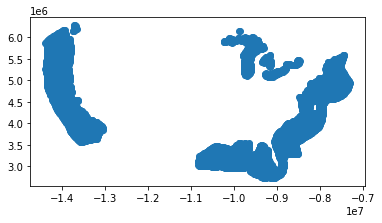

In [137]:
nrel_open_gdf.plot()

In [138]:
nrel_open_gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [139]:
sub_land = gpd.read_file(datapath+"/SSL/SubmergedOTLS.shp")

In [140]:
sub_land.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [141]:
sub_land.replace([np.inf, -np.inf], np.nan, inplace=True)
nrel_open_gdf.replace([np.inf, -np.inf], np.nan, inplace=True)

<AxesSubplot:>

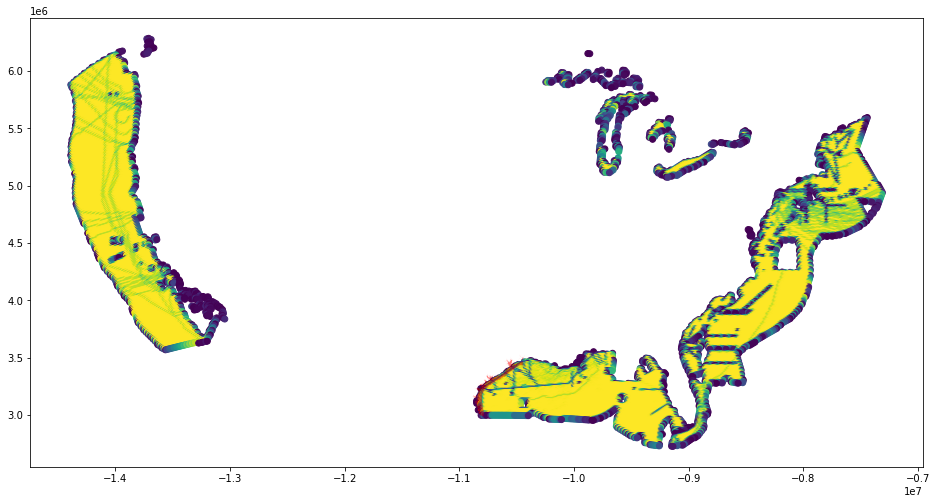

In [147]:
fig, ax = plt.subplots(figsize=(16,12))
nrel_open_gdf.plot(ax=ax, column="capacity_mw")
sub_land.plot(ax=ax, alpha=0.5, color="red")

In [148]:
sub_land.total_bounds

array([-10886936.8755,   2993523.1854, -10429325.1377,   3526649.6946])

<AxesSubplot:>

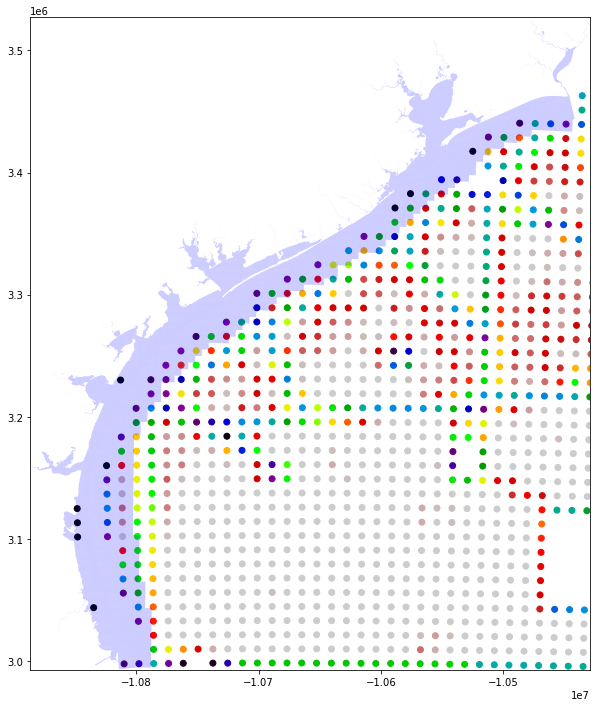

In [152]:
fig, ax = plt.subplots(figsize=(16,12))
ax.set_xlim([-10887000, -10429000])
ax.set_ylim([2993000, 3527000])
nrel_open_gdf.plot(ax=ax, column="capacity_mw", cmap ="nipy_spectral")
sub_land.plot(ax=ax, alpha=0.2, color="blue")

In [163]:
wind_on_glo = gpd.sjoin(sub_land, nrel_open_gdf , how="left", op='intersects')

In [171]:
wind_glo_sorted = wind_on_glo[wind_on_glo["WATERBODY"].notnull()==True].sort_values(by=["capacity_mw", "capacity_factor", "distance_to_coast_km"], ascending=False)

<AxesSubplot:>

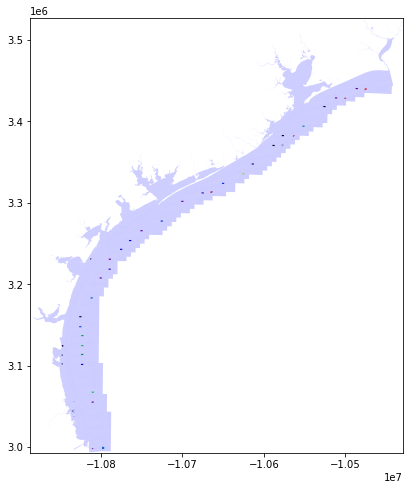

In [188]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim([-10887000, -10429000])
ax.set_ylim([2993000, 3527000])
wind_glo_sorted.plot(ax=ax, column="capacity_mw", cmap ="nipy_spectral")
sub_land.plot(ax=ax, alpha=0.2, color="blue")